## Plot accuracy scores

In [3]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes

In [4]:
# Define the path for the new subdirectory
accuracy_dir <- "./figures/accuracy_scores"

# Create the subdirectory if it doesn't already exist
if (!dir.exists(accuracy_dir)) {
  dir.create(accuracy_dir, recursive = TRUE)  # 'recursive' ensures all parent directories are created if they don't exist
}

# Load the accuracy scores
accuracy_path <- file.path("./results/accuracy_scores_per_heart.csv")
accuracy_df <- read.csv(accuracy_path)

# Include cell type as healthy or failing based on heart number
accuracy_df <- accuracy_df %>%
  mutate(Cell_Type = case_when(
    Heart_Number %in% c(2, 7) ~ "Healthy",
    TRUE ~ "Failing"
  ))

# Update data_set name based on conditions
accuracy_df <- accuracy_df %>%
  mutate(Data_Set = case_when(
    Data_Set == "Holdout1" & Heart_Number == 7 ~ "DMSO holdout",
    Data_Set == "Holdout1" & Heart_Number == 29 ~ "Failing heart holdout",
    Data_Set == "Holdout2" ~ "Random well holdout",
    TRUE ~ Data_Set  # Keep other values unchanged
  ))


# Check the dimensions and first two rows
dim(accuracy_df)
head(accuracy_df, 2)


[1] 34  5

,Accuracy,Model,Data_Set,Heart_Number,Cell_Type
,<dbl>,<chr>,<chr>,<int>,<chr>
1,0.4406897,Shuffled,Training,2,Healthy
2,0.5293537,Shuffled,Training,4,Failing


In [5]:
# Split the final model and shuffled model results for plotting
final_df <- accuracy_df %>% filter(Model == "Final")
shuffled_df <- accuracy_df %>% filter(Model == "Shuffled")

# Look over the dataframes to confirm it looks correct
dim(final_df)
head(final_df,2)
dim(shuffled_df)
head(shuffled_df,2)

[1] 17  5

,Accuracy,Model,Data_Set,Heart_Number,Cell_Type
,<dbl>,<chr>,<chr>,<int>,<chr>
1,0.9124138,Final,Training,2,Healthy
2,0.9067588,Final,Training,4,Failing


[1] 17  5

,Accuracy,Model,Data_Set,Heart_Number,Cell_Type
,<dbl>,<chr>,<chr>,<int>,<chr>
1,0.4406897,Shuffled,Training,2,Healthy
2,0.5293537,Shuffled,Training,4,Failing


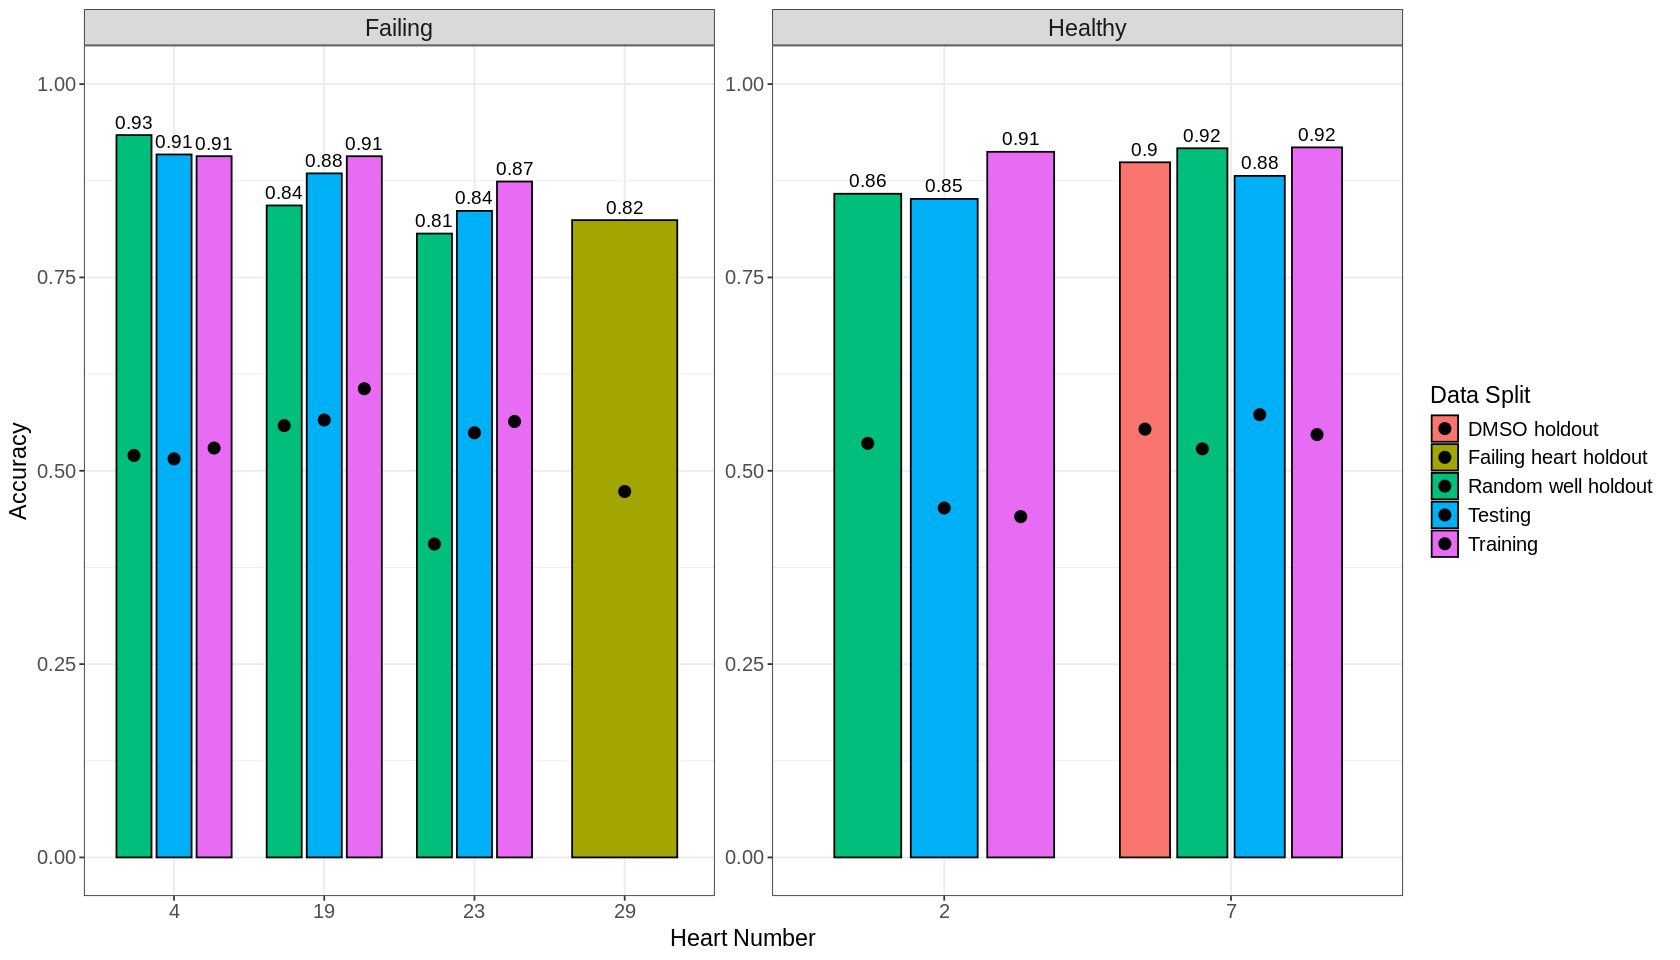

In [6]:
# Adjust plot size
options(repr.plot.width=14, repr.plot.height=8)

# Bar plot of accuracies based on cell type and data split
accuracy_plot_gg <- ggplot(final_df, aes(x = factor(Heart_Number), y = Accuracy, fill = Data_Set)) +
  geom_col(position = position_dodge(width = 0.8), width = 0.7, color = "black") +  # Adjust width and dodge for bars
  geom_text(aes(label = round(Accuracy, 2)), 
            position = position_dodge(width = 0.8), vjust = -0.5, size = 4) +  # Add accuracy numbers over bars with larger text size
  geom_point(data = shuffled_df, position = position_dodge(width = 0.8), size = 3) +  # Add points for shuffled_df with larger point size
  facet_wrap(~ Cell_Type, scales = "free") +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.25)) +  # Set y-axis limits, breaks, and format labels as percentages
  theme_bw() +
  labs(x = "Heart Number",
       y = "Accuracy",
       fill = "Data Split") +
  theme(
    strip.text = element_text(size = 14),  # Adjust facet titles size
    axis.title.x = element_text(size = 14),  # Adjust x-axis title size
    axis.title.y = element_text(size = 14),  # Adjust y-axis title size
    axis.text.x = element_text(size = 12),  # Adjust x-axis tick labels size
    axis.text.y = element_text(size = 12),  # Adjust y-axis tick labels size
    legend.title = element_text(size = 14),  # Adjust legend title size
    legend.text = element_text(size = 12),  # Adjust legend text size
    legend.position = "right"  # Move legend to the bottom
  )

# Save the plot
ggsave(
  paste0(accuracy_dir, "/accuracy_plot_plate_4_per_heart_downsample.pdf"), 
  plot = accuracy_plot_gg, 
  width = getOption("repr.plot.width"), 
  height = getOption("repr.plot.height"), 
  dpi = 500
)

accuracy_plot_gg